<a href="https://colab.research.google.com/github/zahidshaon/Machine-Learning-Based-ETP-Outlet-Monitoring/blob/main/cnn_binary_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical


In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_directory = '/content/drive/MyDrive/CNN/data/train'
outputmodel= r"/content/drive/MyDrive/CNN/model/videoclassificationmodel"
SIZE = 180
dataset = []   
label = []

In [ ]:
etp_on = os.listdir(image_directory+ '/on/')
for i, image_name in enumerate(etp_on):    
    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + '/on/' + image_name)
        image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

etp_off = os.listdir(image_directory + '/off/')
for i, image_name in enumerate(etp_off):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + '/off/' + image_name)
        image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)        

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [ ]:
dataset = np.array(dataset)
label = np.array(label)

In [ ]:
# Label binarizer
lb= LabelBinarizer()
labels= lb.fit_transform(label)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.25, random_state =0)

In [ ]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [ ]:
INPUT_SHAPE = (SIZE, SIZE, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',             
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 178, 178, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 87, 87, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        1

In [ ]:
# #data augmentation
# batch_size=16
# train_datagen= ImageDataGenerator(
#     rotation_range=45,
#     zoom_range=0.2,
#     shear_range=0.2,
#     horizontal_flip= True,
#     vertical_flip=False,
#     rescale=1./255
# )
# validationAugmentation= ImageDataGenerator(
#     rescale=1./255
# )
# # mean= np.array([128.68,116.779,103.939],dtype="float32")
# # traininAugmentation.mean= mean
# # validationAugmentation.mean= mean
# #train_generator= train_datagen.flow_from_directory

# history= model.fit_generator(   
#     train_datagen.flow(X_train,y_train,batch_size=16),
#     steps_per_epoch= len(X_train)//16,
#     validation_data= validationAugmentation.flow(X_test,y_test),
#     validation_steps= len(X_test)//16,
#     # callbacks=[augmented_checkpoint,callback],
#     epochs=10
# )
# model.save(outputmodel,save_format="h5")

In [ ]:
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 50,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )


# model.save(outputmodel)

Epoch 1/50
60/60 [==============================] - 138s 2s/step - loss: 0.1179 - accuracy: 0.9646 - val_loss: 0.0687 - val_accuracy: 0.9781
Epoch 2/50
60/60 [==============================] - 140s 2s/step - loss: 0.1075 - accuracy: 0.9661 - val_loss: 0.0593 - val_accuracy: 0.9820
Epoch 3/50
60/60 [==============================] - 139s 2s/step - loss: 0.0781 - accuracy: 0.9734 - val_loss: 0.1477 - val_accuracy: 0.9492
Epoch 4/50
60/60 [==============================] - 140s 2s/step - loss: 0.5542 - accuracy: 0.9734 - val_loss: 0.0577 - val_accuracy: 0.9812
Epoch 5/50
60/60 [==============================] - 140s 2s/step - loss: 0.1844 - accuracy: 0.9703 - val_loss: 0.0942 - val_accuracy: 0.9719
Epoch 6/50
60/60 [==============================] - 141s 2s/step - loss: 0.0581 - accuracy: 0.9828 - val_loss: 0.0566 - val_accuracy: 0.9820
Epoch 7/50
60/60 [==============================] - 140s 2s/step - loss: 0.1234 - accuracy: 0.9679 - val_loss: 0.1311 - val_accuracy: 0.9547
Epoch 8/50
60

In [ ]:
# from keras.models import load_model
# model= load_model(r"/content/drive/MyDrive/CNN/model/videoclassificationmodel/saved_model.pb")

In [ ]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

40/40 [==============================] - 12s 301ms/step - loss: 0.2005 - accuracy: 0.9758
Accuracy =  97.5781261920929 %


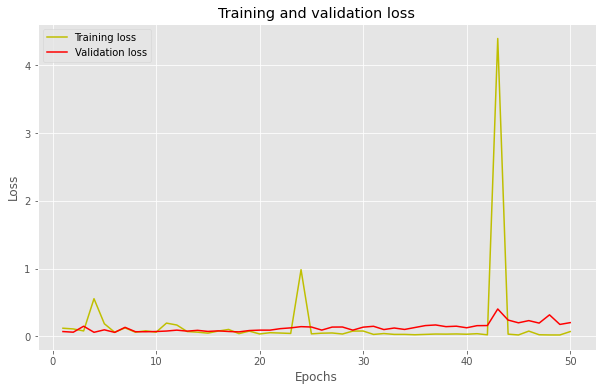

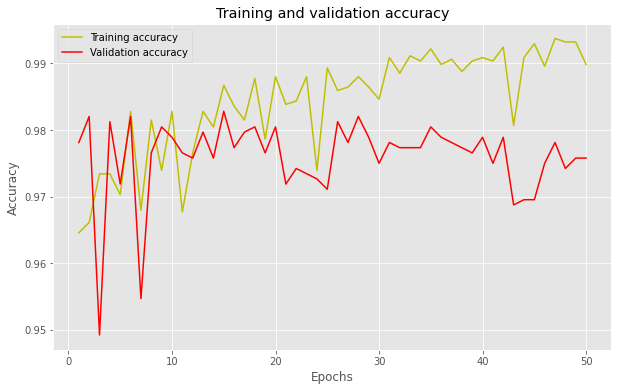

In [ ]:
plt.style.use('ggplot')
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(10,6))
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(10,6))
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The prediction for this image is:  [[2.407745e-06]]
The actual label for this image is:  0


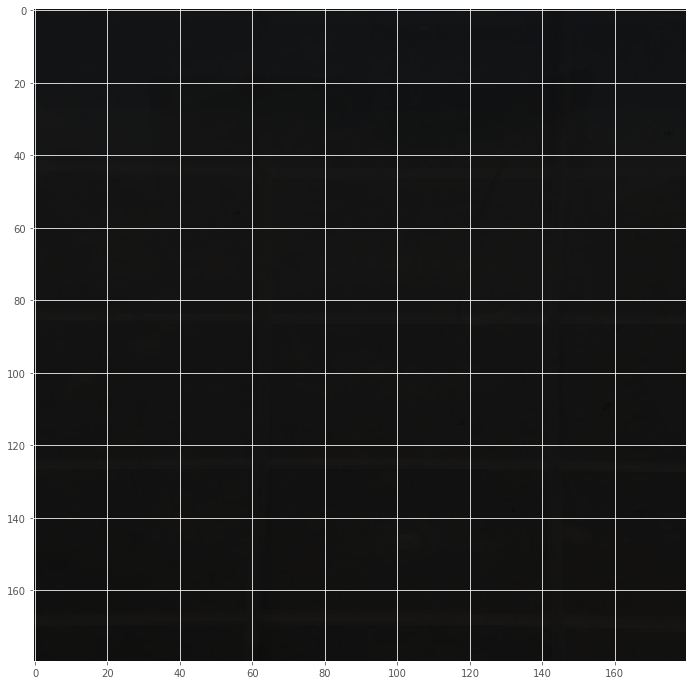

<Figure size 720x432 with 0 Axes>

In [ ]:
n= 637 #Select the index of image to be loaded for testing
img = X_test[n]
plt.figure(figsize=(18,12))
plt.imshow(img)
plt.figure(figsize=(10,6))
input_img = np.expand_dims(img, axis=0) 
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])
# 0 for 'on'
# 1 for 'off'

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
mythreshold=0.077
y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)

[[524  36]
 [ 16 704]]


In [ ]:
from sklearn.metrics import roc_curve


<Figure size 432x288 with 0 Axes>

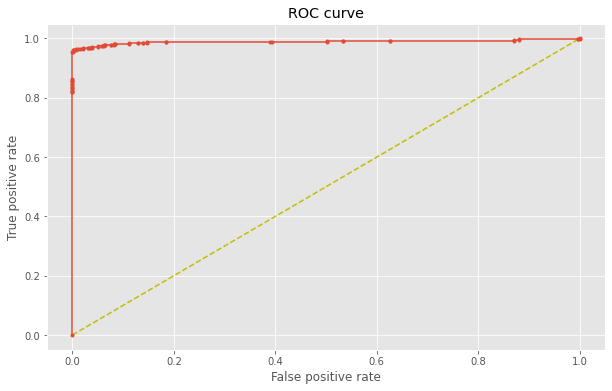

In [ ]:
y_preds = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1) 
plt.figure(figsize=(10,6)) 
plt.plot([0, 1], [0, 1], 'y--') 
plt.plot(fpr, tpr, marker='.') 
plt.xlabel('False positive rate') 
plt.ylabel('True positive rate') 
plt.title('ROC curve') 
plt.show()

In [ ]:
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  
print("Ideal threshold is: ", ideal_roc_thresh['thresholds'])

Ideal threshold is:  25    0.28501
Name: thresholds, dtype: float32


In [ ]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve: ", auc_value)

In [ ]:
import pickle
from keras.models import load_model
from collections import deque
from google.colab.patches import cv2_imshow

In [ ]:
lbinarizer= open(r"/content/drive/MyDrive/CNN/model/lbinarizer.pickle","wb")
lbinarizer.write(pickle.dumps(label))
lbinarizer.close()

In [ ]:
model= load_model(r"/content/drive/MyDrive/CNN/model/videoclassificationmodel")
lb= pickle.loads(open(r"/content/drive/MyDrive/CNN/model/lbinarizer.pickle","rb").read())
outputvideo=r"/content/drive/MyDrive/CNN/video/output/output.mp4"
#mean=np.array([123.68,116.779,103.939][::1],dtype="float32")
Queue= deque(maxlen= 128)

In [ ]:
from google.colab.patches import cv2_imshow
capture_video= cv2.VideoCapture(r"/content/drive/MyDrive/CNN/video/input/test.mp4")
writer= None
(Width,Height)=(None, None)
while True:
  (taken, frame)= capture_video.read()
  if not taken:
    break
  if Width is None or Height is None:
    (Width,Height)= frame.shape[:2]

  output= frame.copy()
  frame= cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
  frame= cv2.resize(frame, (SIZE, SIZE)).astype("float32")
 # frame-=mean
  prediction=model.predict(np.expand_dims(frame, axis=0))[0]
  Queue.append(prediction)  
  results= np.array(Queue).mean(axis=0)
  j=np.argmax(results)
  l= lb.classes_[j]
  text= "VERDICT : {}".format(l)
  cv2.putText(output, text, (45, 60), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (0,255,0),5)

  if writer is None:
    fourcc= cv2.VideoWriter_fourcc(*"MJPG")
    writer= cv2.VideoWriter(outputvideo, fourcc, 30, (Width,Height),True)

  writer.write(output)
  cv2_imshow(output)
  key= cv2.waitKey(1) & 0xFF
  if key==ord("q"):
    break

writer.release()
capture_video.release()
